Document File: https://docs.google.com/document/d/1KZsj1Gpbms-VihzDwu8Z2ofkRBwUFZn-yRBWommTRCI/edit?tab=t.0

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Question 1

Steps

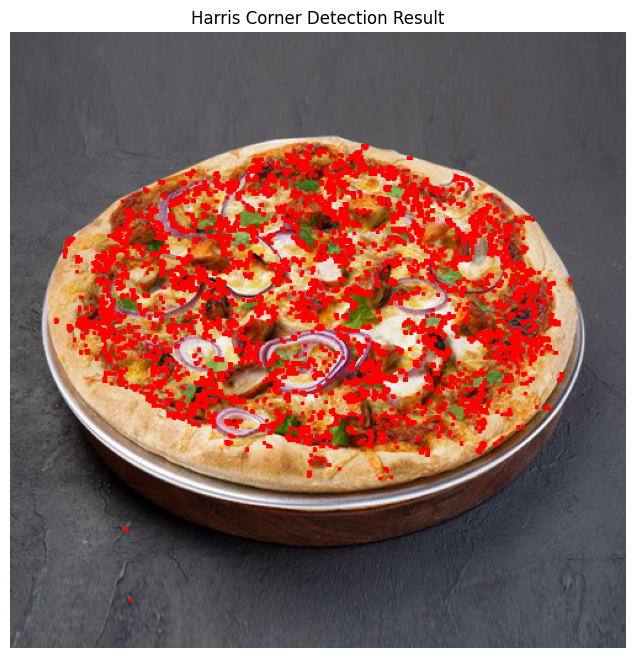

In [5]:
image_path = "Pizza.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Harris Corner Detection Result')
plt.show()


Analyzing the result:

```
# 1  Yes it detects some corners on the pepperoni slices, especially where there's contrast or texture.
# 2 The crust edges are identified as corners due to their sharp intensity changes and rough texture.
# 3 The algorithm detects many corners in the cheese texture where brightness varies, capturing fine-grained detail.
```



2. Analysis


Analyze: **
Harris Corner Detection is designed to find corners—points with strong intensity changes in multiple directions. Circular shapes and smooth curves lack such abrupt changes, so fewer corners are detected. Irregular toppings might create false positives due to texture noise, leading to cluttered results.

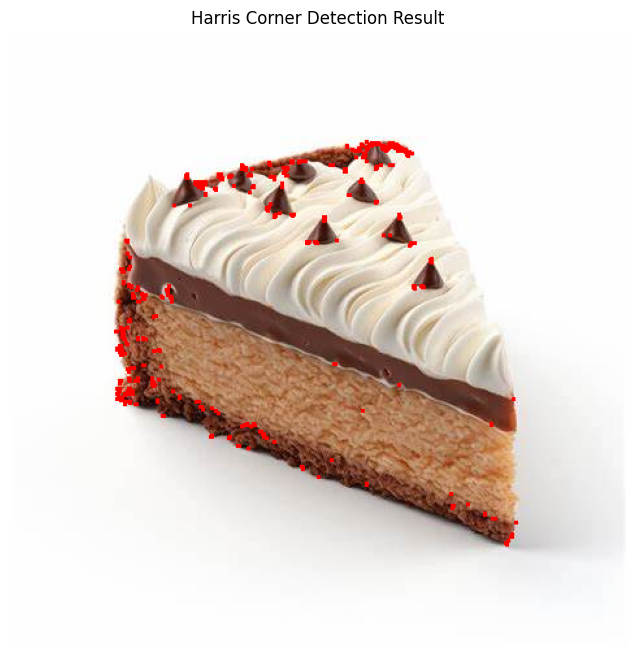

In [8]:
image_path = "slize.jpg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray) #float32 convertion required by cornerHarris

#Harris Corner Detection
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]  # Red color for corners
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Harris Corner Detection Result')
plt.show()


More success with cake slice can be observed as some sharp corners from  slice edges, where the whole pizza with toppings has overwhelming number of corners due to texture and toppings—lots of "noise" for Harris, not very precise.

Question: 2

Part 1:

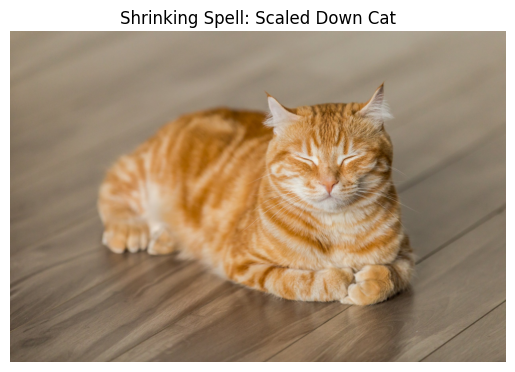

In [17]:
image = cv2.imread('cat.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

shrunk_cat = cv2.resize(image, (int(image.shape[1] * 0.5), int(image.shape[0] * 0.5)))

plt.imshow(shrunk_cat)
plt.title("Shrinking Spell: Scaled Down Cat")
plt.axis('off')
plt.show()


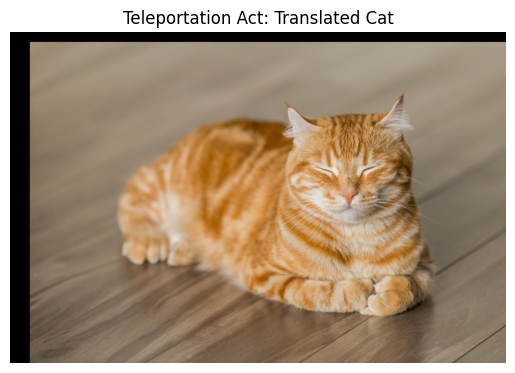

In [18]:
M_translate = np.float32([[1, 0, 100], [0, 1, 50]])
translated_cat = cv2.warpAffine(image, M_translate, (image.shape[1], image.shape[0]))


plt.imshow(translated_cat)
plt.title("Teleportation Act: Translated Cat")
plt.axis('off')
plt.show()


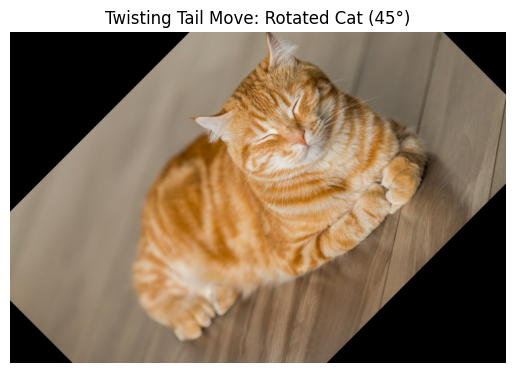

In [19]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
M_rotate = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_cat = cv2.warpAffine(image, M_rotate, (w, h))


plt.imshow(rotated_cat)
plt.title("Twisting Tail Move: Rotated Cat (45°)")
plt.axis('off')
plt.show()


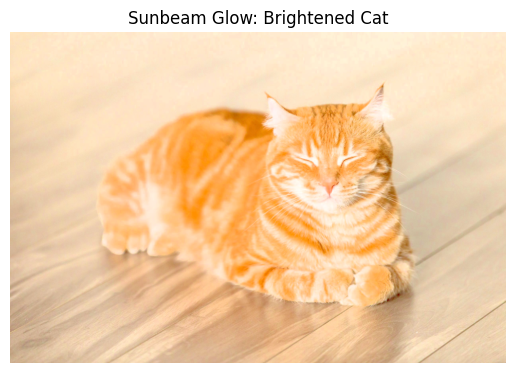

In [20]:
hsv_cat = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
hsv_cat[:, :, 2] = cv2.add(hsv_cat[:, :, 2], 100)  # Increasing brightness
bright_cat = cv2.cvtColor(hsv_cat, cv2.COLOR_HSV2RGB)

plt.imshow(bright_cat)
plt.title("Sunbeam Glow: Brightened Cat")
plt.axis('off')
plt.show()


Part 2:

In [21]:
image = cv2.imread('cat.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

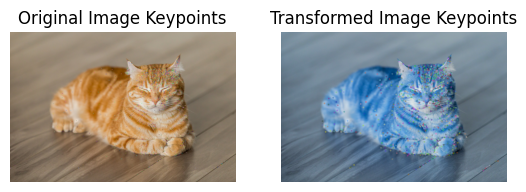

In [22]:
sift = cv2.SIFT_create()

keypoints_original, descriptors_original = sift.detectAndCompute(image, None)
keypoints_transformed, descriptors_transformed = sift.detectAndCompute(shrunk_cat, None)

img_original_keypoints = cv2.drawKeypoints(image, keypoints_original, None)
img_transformed_keypoints = cv2.drawKeypoints(shrunk_cat, keypoints_transformed, None)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_original_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Original Image Keypoints")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_transformed_keypoints, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image Keypoints")
plt.axis('off')
plt.show()


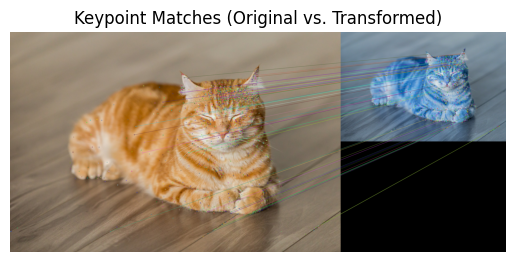

In [23]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(descriptors_original, descriptors_transformed)

matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(image, keypoints_original, shrunk_cat, keypoints_transformed, matches[:50], None)

plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("Keypoint Matches (Original vs. Transformed)")
plt.axis('off')
plt.show()

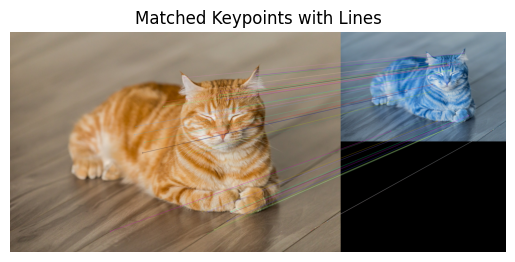

In [24]:
img_lines = cv2.drawMatches(image, keypoints_original, shrunk_cat, keypoints_transformed, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(cv2.cvtColor(img_lines, cv2.COLOR_BGR2RGB))
plt.title("Matched Keypoints with Lines")
plt.axis('off')
plt.show()

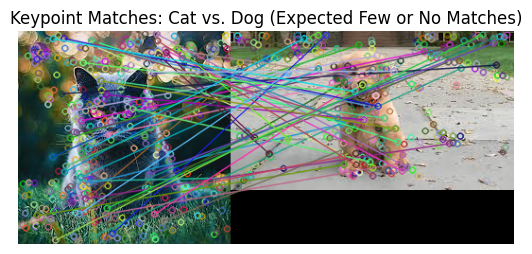

In [28]:
cat_image = cv2.imread('cattie.jpeg')
dog_image = cv2.imread('dog.jpg')

cat_image_rgb = cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB)
dog_image_rgb = cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB)

sift = cv2.SIFT_create()

keypoints_cat, descriptors_cat = sift.detectAndCompute(cat_image, None)
keypoints_dog, descriptors_dog = sift.detectAndCompute(dog_image, None)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(descriptors_cat, descriptors_dog)

matches = sorted(matches, key=lambda x: x.distance)

img_matches = cv2.drawMatches(cat_image, keypoints_cat, dog_image, keypoints_dog, matches[:50], None)

plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("Keypoint Matches: Cat vs. Dog (Expected Few or No Matches)")
plt.axis('off')
plt.show()

No, SIFT will not confuse a cat and a dog, even if they are shape-shifting or disguised.
SIFT (Scale-Invariant Feature Transform) can’t handle a devious disguise like a cat trying to look like a dog. SIFT detects distinctive features (e.g., edges, textures) that are unique to each object. Since cats and dogs have different shapes and textures, SIFT will identify them as separate objects. The keypoints and descriptors will not match well between the two images, even with a disguise. Therefore, SIFT can easily distinguish between a cat and a dog, despite the cat’s efforts to deceive.

Question 3

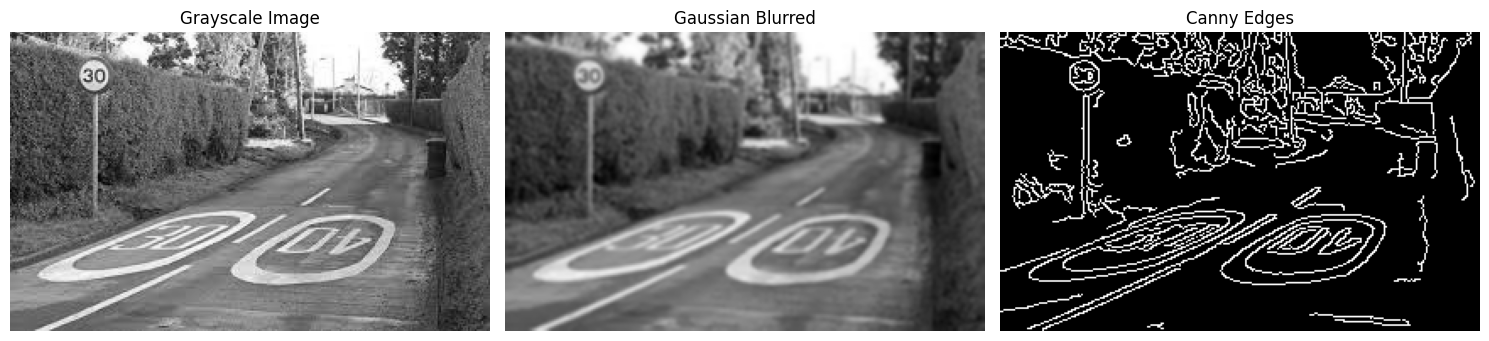

In [34]:
image_path = "road.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Gaussian Blurred')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


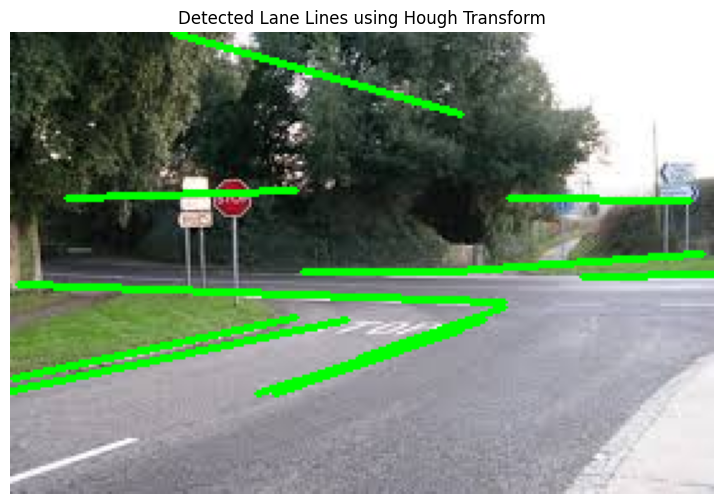

In [30]:
line_image = np.copy(image)

# defining Hough Transform parameters
rho = 1
theta = np.pi / 180
threshold = 50
min_line_length = 50
max_line_gap = 20

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        minLineLength=min_line_length, maxLineGap=max_line_gap)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

line_image_rgb = cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.title("Detected Lane Lines using Hough Transform")
plt.imshow(line_image_rgb)
plt.axis('off')
plt.show()


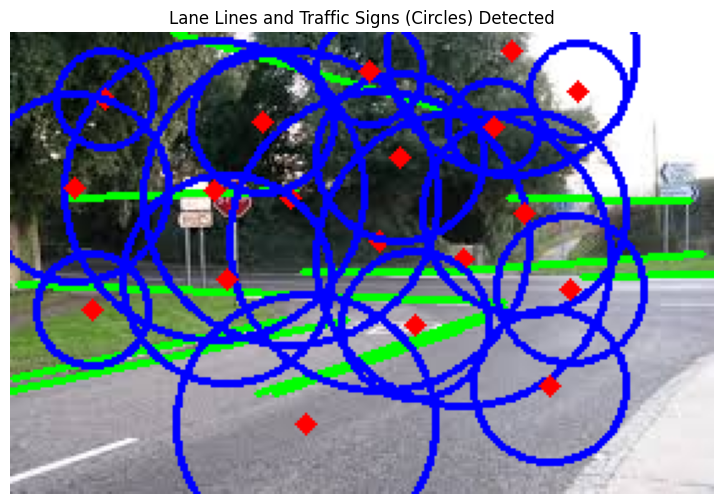

In [36]:
gray_for_circles = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# median blur to reduce noise
gray_blurred = cv2.medianBlur(gray_for_circles, 5)

# Detecting circles
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=100,
    param2=30,
    minRadius=10,
    maxRadius=60
)
circle_image = line_image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        #outer circle
        cv2.circle(circle_image, (x, y), r, (255, 0, 0), 2)
        #center of the circle
        cv2.circle(circle_image, (x, y), 2, (0, 0, 255), 3)

circle_image_rgb = cv2.cvtColor(circle_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.title("Lane Lines and Traffic Signs (Circles) Detected")
plt.imshow(circle_image_rgb)
plt.axis('off')
plt.show()


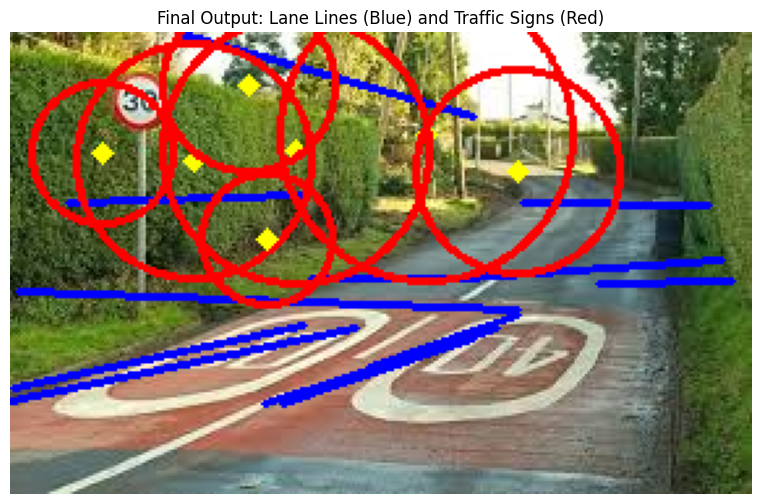

In [35]:
final_output = np.copy(image)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(final_output, (x1, y1), (x2, y2), (255, 0, 0), 2)

circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1.2,
    minDist=30,
    param1=100,
    param2=30,
    minRadius=10,
    maxRadius=60
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, r = circle
        cv2.circle(final_output, (x, y), r, (0, 0, 255), 2)
        cv2.circle(final_output, (x, y), 2, (0, 255, 255), 3)

final_output_rgb = cv2.cvtColor(final_output, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 6))
plt.title("Final Output: Lane Lines (Blue) and Traffic Signs (Red)")
plt.imshow(final_output_rgb)
plt.axis('off')
plt.show()
